In [215]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import calendar
import statistics
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display

In [84]:
# Define functions
def getNextMonth(d):
    """
    getNextMonth function gets the date of the next month of the input date.

    :param d: the date to get the next month
    :return: the date of the next month of the input date
    """
    _year = d.year+(d.month//12)
    _month =  1 if (d.month//12) else d.month + 1
    next_month_len = calendar.monthrange(_year,_month)[1]
    next_month = d
    if d.day > next_month_len:
        next_month = next_month.replace(day=next_month_len)
    next_month = next_month.replace(year=_year, month=_month)
    return next_month

# Example
# d = dt.datetime.strptime('2022-12-04', "%Y-%m-%d")
# print(getNextMonth(d))
# 2023-01-04 00:00:00

def isNextMonth(date1, date2):
    """
    isNextMonth function checks if date2 is the next month of date1.

    :param date1: the original date
    :param date2: the date to be checked
    :return: True/False, True if date2 is the next month of date1
    """
    d1 = dt.datetime.strptime(date1, "%Y-%m-%d")
    next_d1 = getNextMonth(d1)
    d2 = dt.datetime.strptime(date2, "%Y-%m-%d")
    
    next_date1_year = next_d1.year
    next_date1_month = next_d1.month
    date2_year = d2.year
    date2_month = d2.month
    
    if next_date1_year == date2_year and next_date1_month == date2_month:
        return True
    else:
        return False
    
# Example
# print(isNextMonth('2022-12-1', '2022-10-1'))
# print(isNextMonth('2022-12-1', '2023-1-1'))
# False
# True

def isThreeConsecutiveMonths(date1, date2, date3):
    """
    isThreeConsecutiveMonths function checks if date1, date2, and date3 are the three consecutive months.

    :param date1: the original date
    :param date2: the date to be the next month of date1
    :param date3: the date to be the next month of date2
    :return: True/False, True if date1, date2, and date3 are the three consecutive months
    """
    if isNextMonth(date1, date2) and isNextMonth(date2, date3):
        return True
    else:
        return False
    
# Example
# print(isThreeConsecutiveMonths('2022-12-1', '2022-10-1', '2022-11-1'))
# print(isThreeConsecutiveMonths('2022-12-1', '2023-1-1', '2023-2-1'))
# False
# True

def getNextDate(d):
    """
    getNextDate function gets the next date of the input date.

    :param d: the date to get the next date
    :return: the next date of the input date
    """
    date = dt.datetime.strptime(d, "%Y-%m-%d")
    date += dt.timedelta(days=1)
    r = str(date.year) + "-" + str(date.month) + "-" + str(date.day)
    return r

# Example
# print(getNextDate('2022-12-31'))
# 2023-1-1

def computeDistance(date1, date2):
    """
    computeDistance function compute the number of months which is different between date1 and date2.

    :param date1: the original date
    :param date2: the date after date1
    :return: the number of months which is different between date1 and date2
    """
    d1 = dt.datetime.strptime(date1, "%Y-%m-%d")
    d2 = dt.datetime.strptime(date2, "%Y-%m-%d")
    
    dis = (d2.year - d1.year)*12 + (d2.month-d1.month)
    
    return dis

# Example
# print(computeDistance('2022-12-1', '2023-10-1'))
# print(computeDistance('2022-12-1', '2022-12-4'))
# 10
# 0

In [85]:
# Load data
transactions = pd.read_csv("transactions.csv")
display(transactions.head(5))
display(len(transactions))

,donor_id,date,status,method,amount
0,3010968710038526988,2000-09-11,Success,Credit Card,10.0
1,3010968710038526988,2000-10-11,Success,Credit Card,10.0
2,3010968710038526988,2000-11-11,Success,Credit Card,10.0
3,3010968710038526988,2000-12-11,Success,Credit Card,10.0
4,3010968710038526988,2001-01-11,Success,Credit Card,10.0


651560

In [86]:
# 1. Clean and process the data
# 1.1. Add more columns
transactions.insert(loc=0,
          column='transaction_id',
          value=0)
# Duration to the next successful transaction, unit is month, 100 for the lasting successful transaction
transactions.insert(loc=6,
          column='duration',
          value='')
transactions.insert(loc=7,
          column='churn_date',
          value='')
transactions.insert(loc=8,
          column='variation',
          value='')
transactions.insert(loc=9,
          column='activate',
          value='')
display(transactions.head(5))

,transaction_id,donor_id,date,status,method,amount,duration,churn_date,variation,activate
0,0,3010968710038526988,2000-09-11,Success,Credit Card,10.0,,,,
1,0,3010968710038526988,2000-10-11,Success,Credit Card,10.0,,,,
2,0,3010968710038526988,2000-11-11,Success,Credit Card,10.0,,,,
3,0,3010968710038526988,2000-12-11,Success,Credit Card,10.0,,,,
4,0,3010968710038526988,2001-01-11,Success,Credit Card,10.0,,,,


In [87]:
# 1.2. Upate status to Failed for transactions with amount <= 0
transactions.loc[transactions['amount'] <= 0,'status'] = 'Failed'
display(transactions.loc[transactions['status'] == 'Failed'])

,transaction_id,donor_id,date,status,method,amount,duration,churn_date,variation,activate
196,0,-7882208113119762257,2007-09-17,Failed,Credit Card,0.0,,,,
5059,0,-2625869298489482735,2002-02-19,Failed,Credit Card,0.0,,,,
5060,0,-2625869298489482735,2002-03-19,Failed,Credit Card,0.0,,,,
7486,0,3826088184594753164,2007-01-11,Failed,Credit Card,0.0,,,,
7487,0,3826088184594753164,2007-06-11,Failed,Credit Card,0.0,,,,
...,...,...,...,...,...,...,...,...,...,...
651400,0,-5819989599172667185,2012-06-28,Failed,Direct Debit,0.0,,,,
651404,0,-5819989599172667185,2012-11-29,Failed,Direct Debit,0.0,,,,
651405,0,-5819989599172667185,2012-12-20,Failed,Direct Debit,0.0,,,,
651406,0,-5819989599172667185,2013-02-27,Failed,Direct Debit,0.0,,,,


In [88]:
# 1.3. Sort the data
transactions = transactions.sort_values(['donor_id', 'date'], ascending=[True, True])
transactions.head(5)

,transaction_id,donor_id,date,status,method,amount,duration,churn_date,variation,activate
201849,0,-9222334905648926039,2002-10-17,Success,Credit Card,12.0,,,,
201850,0,-9222334905648926039,2002-11-17,Success,Credit Card,12.0,,,,
201851,0,-9222334905648926039,2002-12-17,Success,Credit Card,12.0,,,,
201852,0,-9222334905648926039,2003-01-17,Success,Credit Card,12.0,,,,
201853,0,-9222334905648926039,2003-02-17,Success,Credit Card,12.0,,,,


In [89]:
# 1.4. Set transactions ids
n = len(transactions)
transactions['transaction_id'] = range(n)
transactions.head(5)

,transaction_id,donor_id,date,status,method,amount,duration,churn_date,variation,activate
201849,0,-9222334905648926039,2002-10-17,Success,Credit Card,12.0,,,,
201850,1,-9222334905648926039,2002-11-17,Success,Credit Card,12.0,,,,
201851,2,-9222334905648926039,2002-12-17,Success,Credit Card,12.0,,,,
201852,3,-9222334905648926039,2003-01-17,Success,Credit Card,12.0,,,,
201853,4,-9222334905648926039,2003-02-17,Success,Credit Card,12.0,,,,


In [101]:
# 2. Identify churns
# 2.1. Set duration column
t = transactions.copy()
n = len(t)
cur_donor = t.loc[t.transaction_id == 0,'donor_id'].values[0]
if t.loc[t.transaction_id == 0,'status'].values[0] == 'Success':
    cur_suc_tran = 0
    t.loc[t.transaction_id == 0,'duration'] = 100 # see as the last successful transaction
else:
    cur_suc_tran = -1
for i in range(1,n):
    if t.loc[t.transaction_id == i,'donor_id'].values[0] == cur_donor:
        if t.loc[t.transaction_id == i,'status'].values[0] == 'Success':
            if cur_suc_tran != -1:
                t.loc[t.transaction_id == cur_suc_tran,'duration'] = computeDistance(t.loc[t.transaction_id == cur_suc_tran,'date'].values[0], t.loc[t.transaction_id == i,'date'].values[0])
            t.loc[t.transaction_id == i,'duration'] = 100 # see as the last successful transaction
            cur_suc_tran = i
    else:
        cur_donor = t.loc[t.transaction_id == i,'donor_id'].values[0]
        if t.loc[t.transaction_id == i,'status'].values[0] == 'Success':
            cur_suc_tran = i
            t.loc[t.transaction_id == i,'duration'] = 100 # see as the last successful transaction
        else:
            cur_suc_tran = -1

t.to_csv('transactions_suc_duration.csv')

In [108]:
# 2.2. Identify churn dates and churns
tran_duration = pd.read_csv("transactions_suc_duration.csv")
tran_duration = tran_duration.drop(tran_duration.columns[[0]], axis=1)
n = len(tran_duration)
for i in range(n):
    if tran_duration.loc[tran_duration.transaction_id == i,'duration'].values[0] > 3:
        tran_duration.loc[tran_duration.transaction_id == i,'churn_date'] = getNextDate(tran_duration.loc[tran_duration.transaction_id == i,'date'].values[0])

tran_duration.to_csv('transactions_churn.csv')

churn = tran_duration.copy()
churn = churn[['donor_id', 'churn_date']]
churn = churn.dropna(subset=['churn_date'])[['donor_id','churn_date' ]]
churn.to_csv('churn.csv')

In [112]:
# 2.3. Identify variation
tran_churn = pd.read_csv("transactions_churn.csv")
tran_churn = tran_churn.drop(tran_churn.columns[[0]], axis=1)
n = len(tran_churn)
tran_churn = tran_churn.reset_index()  # make sure indexes pair with number of rows
cur_donor = tran_churn.loc[0,'donor_id']
for i in range(1, n): 
    donor_id = tran_churn.loc[i,'donor_id']
    if donor_id == cur_donor:
        if tran_churn['status'].iloc[i] == 'Success' and tran_churn['status'].iloc[i-1] == 'Success':
            if tran_churn['amount'].iloc[i] > tran_churn['amount'].iloc[i-1]:
                tran_churn.loc[i,'variation'] = 'Upgrade'
            elif tran_churn['amount'].iloc[i] < tran_churn['amount'].iloc[i-1]:
                tran_churn.loc[i,'variation'] = 'Downgrade'
    else:
        cur_donor = donor_id

tran_churn = tran_churn.drop(tran_churn.columns[[0]], axis=1)            
tran_churn.to_csv('transactions_variation.csv')

In [130]:
# 2.3 Identify activate/reactivate
tran_var = pd.read_csv("transactions_variation.csv")
tran_var = tran_var.drop(tran_var.columns[[0]], axis=1)
n = len(tran_var)
tran_var = tran_var.reset_index()  # make sure indexes pair with number of rows
cur_donor = tran_var.loc[0,'donor_id']
tran_var.loc[0,'activate'] = 'Activate'
cur_type = 'Activate'
if not pd.isna(tran_var['churn_date'].iloc[0]):
    tran_var.loc[0,'activate'] = 'Deactivate'
    cur_type = 'Deactivate'
for i in range(1, n):
    if tran_var.loc[i,'status'] == 'Success':
        donor_id = tran_var.loc[i,'donor_id']
        if donor_id == cur_donor:
            if not pd.isna(tran_var['churn_date'].iloc[i]):
                tran_var.loc[i,'activate'] = 'Deactivate'
                cur_type = 'Deactivate'
            elif cur_type == 'Deactivate':
                tran_var.loc[i,'activate'] = 'Reactivate'
                cur_type = 'Reactivate'
        else:
            cur_donor = donor_id
            tran_var.loc[i,'activate'] = 'Activate'
            cur_type = 'Activate'
            if not pd.isna(tran_var['churn_date'].iloc[i]):
                tran_var.loc[i,'activate'] = 'Deactivate'
                cur_type = 'Deactivate'

tran_var = tran_var.drop(tran_var.columns[[0]], axis=1)            
tran_var.to_csv('processed_transactions.csv')

In [174]:
# 3. Charts and analysis
# 3.1. How big of a problem is donor churn?
churn = pd.read_csv("churn.csv")
churn = churn.drop(churn.columns[[0]], axis=1)
churn = churn.sort_values(['churn_date'], ascending=[True])
n = len(churn)
churn.insert(loc=2,
          column='year',
          value=0)
churn = churn.reset_index()  # make sure indexes pair with number of rows
for i in range(n):
    d = dt.datetime.strptime(churn.loc[i,'churn_date'], "%Y-%m-%d")
    churn.loc[i,'year'] = d.year
    
churn.to_csv('churn_with_year.csv')

duration = max(churn['year']) - min(churn['year'])
average_churn = n/(max(churn['year']) - min(churn['year']))
total = n/(max(churn['year']) - min(churn['year'])) * 12 * 20
print("The total number of churns: " + str(n))
print("The duration for the evaluation of the churns: " + str(duration) + " years, from year " + str(min(churn['year'])) + " to year " + str(max(churn['year'])))
print("The average number of churns per year: " + str(average_churn))
print("Suppose that the amount for each donation per month is $20, the total amount has been lost per year due to the churns = the average number of churns per year * 12 months * $20 per month = $" + str(total))

The total number of churns: 24589
The duration for the evaluation of the churns: 31 years, from year 1989 to year 2020
The average number of churns per year: 793.1935483870968
Suppose that the amount for each donation per month is $20, the total amount has been lost per year due to the churns = the average number of churns per year * 12 months * $20 per month = $190366.45161290327


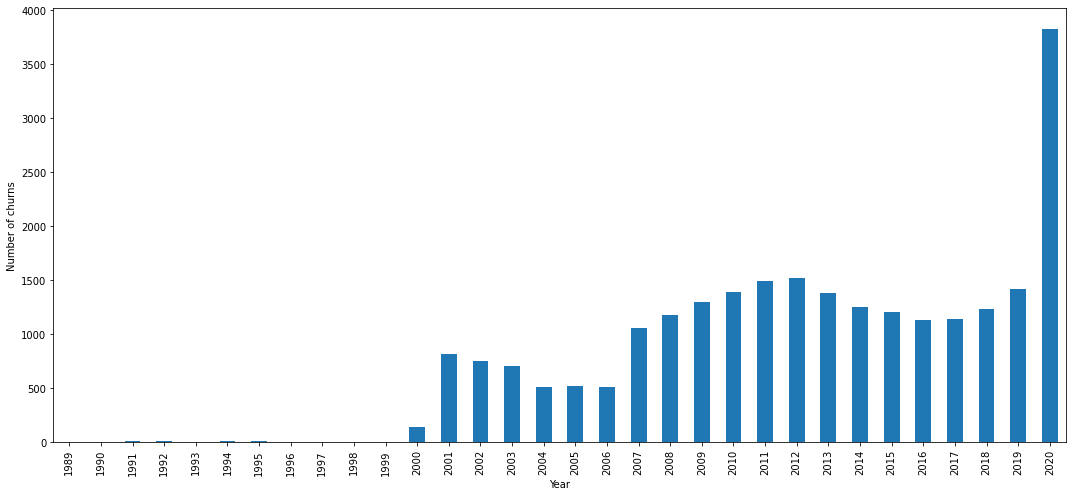

We can see that the churns are worse over time, with an significant increase from 2001. Especially, the number of churns was sharply increased from about 1,500 in 2019 to nearly 4,000 in 2020.


In [200]:
# 3.2. The progress of churns over time
churn = pd.read_csv("churn_with_year.csv")
churn = churn.drop(churn.columns[[0]], axis=1)
churn = churn.sort_values(['year'], ascending=[True])

plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
churn['year'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Year', ylabel='Number of churns')
plt.savefig("churn_problem.pdf", format="pdf", bbox_inches="tight")
plt.savefig("churn_problem.png", format="png", bbox_inches="tight")
plt.show()

print("We can see that the churns are worse over time, with an significant increase from 2001. Especially, the number of churns was sharply increased from about 1,500 in 2019 to nearly 4,000 in 2020.")

In [203]:
# 3.3. Downgrade and churns
tran = pd.read_csv("processed_transactions.csv")
tran = tran.drop(tran.columns[[0]], axis=1)
t = tran.loc[tran['variation'].isin(['Downgrade'])]
t2 = t.loc[t['activate'].isin(['Deactivate'])]

print("The number of churns which are after a downgrade is: " + str(len(t2)) + ". Although it is a small number, we may need to follow up the cases of Downgrade to avoid unnecessary churns.")

The number of churns which are after a downgrade is: 296. Although it is a small number, we may need to follow up the cases of Downgrade to avoid unnecessary churns.


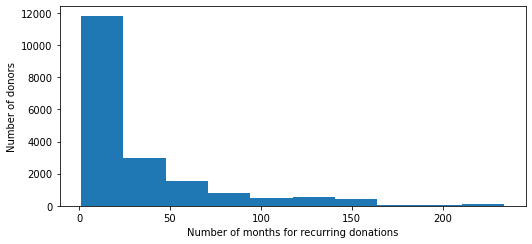

The average number of months for recurring donations is: 32.21833254131686. Thus, we may need to follow up with donors who have their donations over continuous 30 months.


In [223]:
# 3.4. The duration for recurring donations
tran = pd.read_csv("processed_transactions.csv")
tran = tran.drop(tran.columns[[0]], axis=1)
t = tran.loc[tran['activate'].isin(['Activate', 'Deactivate', 'Reactivate'])].copy()
t.insert(loc=10,
          column='donation_duration',
          value=0)
t = t.reset_index()  # make sure indexes pair with number of rows
n = len(t)

cur_donor = t.loc[0,'donor_id']
cur_type = t.loc[0,'activate']

for i in range(1, n):
    donor_id = t.loc[i,'donor_id']
    if donor_id == cur_donor:
        if cur_type in ['Activate', 'Reactivate'] and t['activate'].iloc[i] == 'Deactivate':
            t.loc[i,'donation_duration'] = computeDistance(t['date'].iloc[i-1], t['date'].iloc[i])
            cur_type = 'Deactivate'
        else:
            cur_type = t.loc[i,'activate']
    else:
        cur_donor = donor_id
        cur_type = t.loc[i,'activate']

t = t.loc[t['donation_duration'] > 0]
durations = t.loc[:,'donation_duration']
mean = statistics.mean(durations)

plt.rcParams["figure.figsize"] = [7.5,3.5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.set_xlabel('Number of months for recurring donations')
ax.set_ylabel('Number of donors')
plt.hist(durations)
plt.savefig("durations.pdf", format="pdf", bbox_inches="tight")
plt.savefig("durations.png", format="png", bbox_inches="tight")
plt.show()

print("The average number of months for recurring donations is: " + str(mean) + ". Thus, we may need to follow up with donors who have their donations over continuous 30 months.")

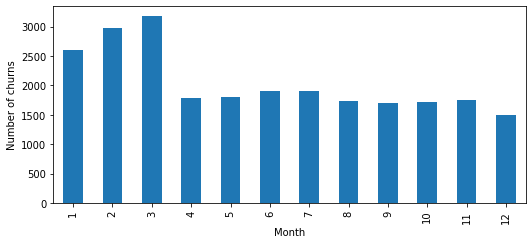

We can see that the churns in January, February, and March are significantly more than those in other months. Thus, we may also need to focus on these months.


In [229]:
# 3.5. The churns over months
churn = pd.read_csv("churn.csv")
churn = churn.drop(churn.columns[[0]], axis=1)
churn = churn.sort_values(['churn_date'], ascending=[True])
n = len(churn)
churn.insert(loc=2,
          column='month',
          value=0)
churn = churn.reset_index()  # make sure indexes pair with number of rows
for i in range(n):
    d = dt.datetime.strptime(churn.loc[i,'churn_date'], "%Y-%m-%d")
    churn.loc[i,'month'] = d.month
    
churn.to_csv('churn_with_month.csv')

plt.rcParams["figure.figsize"] = [7.5, 3.5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
churn['month'].value_counts().sort_index().plot(ax=ax, kind='bar', xlabel='Month', ylabel='Number of churns')
plt.savefig("churn_month.pdf", format="pdf", bbox_inches="tight")
plt.savefig("churn_month.png", format="png", bbox_inches="tight")
plt.show()

print("We can see that the churns in January, February, and March are significantly more than those in other months. Thus, we may also need to focus on these months.")